*6132-010402D Макарова Мария*

1. Загрузить датасет WINE.
2. Подготовить датасет WINE для кластеризации удалив информацию о классах.
3. Произвести нормировку preprocessing.StandartScaler().
4. Произвести кластеризацию с использованием Kmeans++ с числом кластеров равным 3.
5. Получить значения метрик качества Homogeneity и Completeness для Kmeans++, используя исходную информацию о классах (использовать информацию об исходных классах).
6. Для заданных алгоритмов кластеризации AgglomerativeClustering и DBSCAN подобрать параметры алгоритмов обеспечивающие максимум качества кластеризации про метрике Completeness (использовать информацию об исходных классах).
7. Сравнить результаты кластеризации различными алгоритмами между собой и с алгоритмом Kmeans++ (не использовать информацию об исходных классах).
8. Определить оптимальное число кластеров для кластеризации датасета WINE.
9. Сформулировать вывод и записать в качестве ответа в текстовое поле. В качестве ответа также разместить ipynb файл.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import homogeneity_score, completeness_score
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

In [2]:
wine = load_wine()
data_without_labels = pd.DataFrame(wine.data, columns=wine.feature_names)

labels = wine.target

In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_without_labels)

In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

homogeneity = homogeneity_score(labels, kmeans_labels)
completeness = completeness_score(labels, kmeans_labels)

print(f"Homogeneity: {homogeneity}")
print(f"Completeness: {completeness}")

Homogeneity: 0.8788432003662366
Completeness: 0.8729636016078731


In [14]:
best_completeness_agg = 0
best_params_agg = None

for linkage in ['ward', 'complete', 'average', 'single']:
   for n_clusters in range(2, 10):
      agg = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
      agg_labels = agg.fit_predict(data_scaled)
      completeness = completeness_score(labels, agg_labels)

      if completeness > best_completeness_agg:
        best_completeness_agg = completeness
        best_params_agg =  {'n_clusters': n_clusters, 'linkage': linkage}

print(f"Best AgglomerativeClustering Completeness: {best_completeness_agg} with {best_params_agg}")

best_completeness_dbscan = 0
best_params_dbscan = None

for eps in np.arange(0.5, 5, 0.5):
    for min_samples in range(3, 10):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_scaled)

        if len(set(dbscan_labels)) > 1:
            completeness = completeness_score(labels, dbscan_labels)

            if completeness > best_completeness_dbscan:
                best_completeness_dbscan = completeness
                best_params_dbscan = {'eps': eps, 'min_samples': min_samples}

print(f"Best DBSCAN Completeness: {best_completeness_dbscan} with {best_params_dbscan}")

Best AgglomerativeClustering Completeness: 0.7825408201875712 with {'n_clusters': 3, 'linkage': 'ward'}
Best DBSCAN Completeness: 0.622213290603565 with {'eps': 2.0, 'min_samples': 9}


In [13]:
kmeans_silhouette = silhouette_score(data_scaled, kmeans_labels)

agg = AgglomerativeClustering(n_clusters=best_params_agg['n_clusters'], linkage=best_params_agg['linkage'])
agg_labels = agg.fit_predict(data_scaled)
agg_silhouette = silhouette_score(data_scaled, agg_labels)

dbscan = DBSCAN(eps=best_params_dbscan['eps'], min_samples=best_params_dbscan['min_samples'])
dbscan_labels = dbscan.fit_predict(data_scaled)
if len(set(dbscan_labels)) > 1:
    dbscan_silhouette = silhouette_score(data_scaled, dbscan_labels)
else:
    dbscan_silhouette = -1

print("Сравнение результатов кластеризации по силуэтному коэффициенту:")
print(f"KMeans++: {kmeans_silhouette}")
print(f"AgglomerativeClustering: {agg_silhouette}")
print(f"DBSCAN: {dbscan_silhouette}")

Сравнение результатов кластеризации по силуэтному коэффициенту:
KMeans++: 0.2848589191898987
AgglomerativeClustering: 0.2774439826952266
DBSCAN: 0.13696497115564155


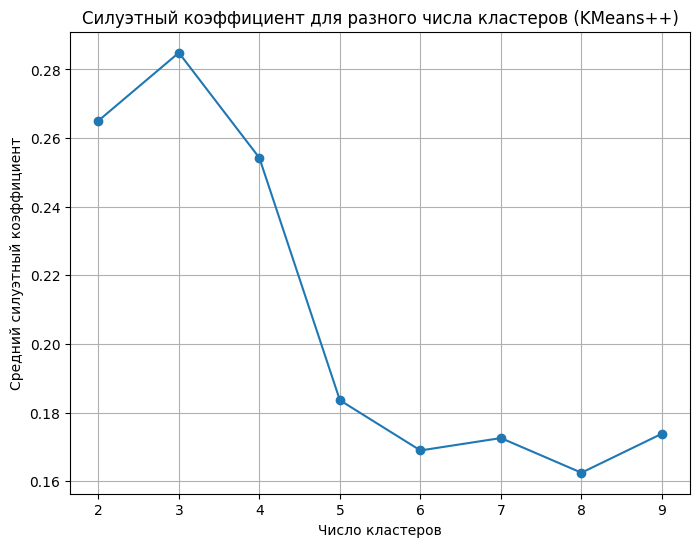

Оптимальное число кластеров для KMeans++: 3


In [12]:
silhouette_scores = []
cluster_range = range(2, 10)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    silhouette_avg = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Силуэтный коэффициент для разного числа кластеров (KMeans++)')
plt.xlabel('Число кластеров')
plt.ylabel('Средний силуэтный коэффициент')
plt.grid()
plt.show()

optimal_n_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Оптимальное число кластеров для KMeans++: {optimal_n_clusters}")